# Проверка гипотез для увеличения выручки интернет - магазина.

В качестве входных данных для исследования получено 9 гипотез, сформулированных совместно с маркетинговым отделом. а также результаты A/B-теста, разбитые на два файла: с заказами и с посещениями. Поставлена задача приоритизировать гипотезы и проанализировать результаты A/B-теста. 

**Цель исследования:** на основании результатов A/B-теста определить возможные пути увеличения выручки интернет-магазина.

**План исследования:**
1. Знакомство с данными и подготовка их к дальнейшему анализу
2. Приоритизация гипотез
3. Анализ результатов A/B-теста
4. Общие выводы по проекту

## 1. Знакомство с данными и подготовка их к дальнейшему анализу

Перед началом исследования загрузим все необходимые для дальнейшей работы библиотеки. 

In [1]:
import pandas as pd # импортируем pandas для работы с таблицами

import numpy as np # импортируем библиотеку numpy для работы с массивами

from datetime import datetime, timedelta # импортируем библиотеку datetime для работы с данными 
#в формате даты и времени

from matplotlib import pyplot as plt # импортируем библиотеку pyplot для работы с графиками

import seaborn as sns # импортируем библиотеку seaborn для работы с инструментами визуализации

from scipy import stats as st # импортируем библиотеку scipy.stats для работы со статистическимм тестами

### 1.1 Знакомство с данными

Прочитаем данные из предоставленных к анализу файлов:

In [2]:
hypothesis = pd.read_csv('hypothesis.csv') # считываем таблицу с гипотезами 

orders = pd.read_csv('orders.csv') # считываем таблицу с заказами

visitors = pd.read_csv('visitors.csv') # считываем таблицу с посещениями

Поочередно выгрузим первые несколько строк из каждого массива. Таблицу с гипотезами выгрузим полностью, так как известно, что гипотез всего 9.

In [3]:
hypothesis
pd.set_option('display.max_colwidth', False)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Теперь выведем основные параметры таблиц, с которыми мы познакомились выше.

In [6]:
display(hypothesis.info())


display(orders.info())


visitors.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


### 1.2 Приведение оформления датафреймов к единому стилю

Заметим, что оформление заголовках в первых двух таблицах (hypothesis и orders) не соответствуют правилам хорошего стиля. Напишем функцию, которая приведет заголовки к нужному виду.

In [7]:
def good_style(df):
    # приводим названия столбцов к нижнему регистру, заменяем пробелы на знак "_"
    df.columns = df.columns.str.replace('Id', '_id').str.lower()
    return df

Используем функцию good_style к первым двум датафреймам. Выведем первые несколько строк каждой из таблиц, чтобы проверить работу функции.

In [8]:
hypothesis = good_style(hypothesis)
display(hypothesis.head())


orders = good_style(orders)
display(orders.head())

visitors = good_style(visitors)
display(visitors.head())

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### 1.3 Изменение формата в столбцах с датой

Вызов метода info показал, что в таблицах с результатами А/В-теста даты хранятся в формате object. Изменим тип данных в этих столбцах на datetime для удобства при дальнейшем использовании.

In [9]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Повторим вызов метода info, чтобы проверить себя.

In [10]:
display(orders.info())

visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### 1.4 Проверка на наличие пропусков в данных

Проверим датафреймы с результатами А/В-теста поочередно на наличие пропусков.

In [11]:
display(orders.isna().sum()) # проверяем на наличие пропусков таблицу с данными о заказах

visitors.isna().sum() # проверяем на наличие пропусков таблицу с данными о посещениях

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

### 1.5 Проверка на наличие дубликатов в данных

Проверим датафреймы с результатами А/В-теста поочередно на наличие явных дубликатов.

In [12]:
display(orders.duplicated().sum()) # проверяем на наличие дубликатов таблицу данными о заказах

visitors.duplicated().sum() # проверяем на наличие дубликатов таблицу с данными о посещениях

0

0

Дополнительно проверим таблицы orders и visitors на наличие неявных дубликатов.

In [13]:
# проверяем наличие дубликатов в orders, сравнивая значения в строках по столбцам 
# с transaction_id и visitor_id 
orders[['transaction_id', 'visitor_id']].duplicated().sum() 

0

In [14]:
# проверяем наличие дубликатов в orders, сравнивая значения в строках по столбцам 
# с transaction_id и date 
orders[['transaction_id', 'date']].duplicated().sum() 

0

In [15]:
# проверяем наличие дубликатов в visitors, сравнивая значения в строках по столбцам 
# с date и group
visitors[['date', 'group']].duplicated().sum() 

0

In [16]:
# проверяем, что внутри групп нет повторяющихся пользователей, считая количество уникальных групп 
# для каждого visitor_id в таблице orders
orders.groupby('visitor_id')['group'].nunique()

visitor_id
5114589       1
6958315       1
8300375       2
11685486      1
39475350      1
             ..
4266935830    2
4278982564    1
4279090005    1
4281247801    1
4283872382    1
Name: group, Length: 1031, dtype: int64

Невооруженным глазом видно, что некоторым visitor_id соответствует несколько уникальных групп. Значит разделение по группам проведено некорректно. Посмотрим, как много пользователей попало в более, чем в одну группу.

In [17]:
# назовем таблицу с количеством уникальных групп для каждого посетителя unique_groups и 
# посчитаем, какое количество таких пользовтаелей присутствует в выборке
unique_group = orders.groupby('visitor_id')['group'].nunique().reset_index()
unique_group.loc[unique_group['group']>1, 'visitor_id'].count()

58

Посчитаем, сколько заказов принадлежит посетителям с visitor_id из получившегося у нас списка. 

In [18]:
orders.loc[orders['visitor_id'].isin(unique_group.loc[unique_group['group']>1,\
        'visitor_id']), 'transaction_id'].count()

181

Всего в таблице orders 1197 строк. Таким образом, количество строк с заказами пользователей, принадлежность которых к определенной группе под вопросом, составляет около 15% от общего количества строк в массиве. Это критическое значение. Удаление такого большого количества строк серьезно исказит результаты анализа. 

Кроме того, для проверки гипотез будут использоваться две таблицы с данными о посетителях - orders и visitors. Таблица visitors также содержит данные о пользователях, которые относятся сразу к обеим группам. Но так как данные в visitors агрегированные, удалить оттуда информацию о пересекающихся посетителях нельзя. 

По перечисленным выше причинам, считаем удаление пользователей, не определенных в конкретную группу, нецелесообразным.

### Вывод

При знакомстве с данными было выявлено, что:

- оформление исходных таблиц не соответсвует правилам хорошего стиля;
- столбцы с информацией о времени содержат данные в неподходящем для дальнейшей работы формате object.

Пропусков и дубликатов в исходных датафреймах обнаружено не было. Однако было выявлено, что некоторые посетители ошибочно определены одновременно в две группы. Так как количество строк с данными о заказах этих посетителей составляет 15% от общего количества строк в массиве orders, а так же в связи с тем, что в таблице visitors также есть данные об этих пользователях, и их нельзя оттуда выделить, было принято решение не удалять информацию из orders.

Таким образом, в ходе предобработки данных перед исследованием, были произведены следующие преобразования:

- наименования столбцов в исходных датафреймах приведены к правилам хорошего стиля;
- столбцы с информацией о времени были приведены к формату datetime, удобному для дальнейшего использования.

## 2. Приоритизация гипотез

Вернемся к нашей первой таблице hypothesis и еще раз посмотрим на информацию, представленную там:

In [19]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Первом столбце перечислены сформулированные совместно с маркетинговым отделом гипотезы, в остальных столбцах зафиксированы параметры: **reach, impact, confidence, efforts**. Данные параметры могут быть испоьзованы для приоритизации гипотез перед проверкой.

### 2.1 Приоритизация с помощью ICE

Применим фреймворк ICE для приоритизации гипотез. Округлим получившиеся значения ICE score до двух знаков полсе запятой и запишем их в отдельный столбец таблицы hypothesis.

In [20]:
hypothesis['ice_score'] = (hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']).round(2)

Выведем получившуюся таблицу.

In [21]:
hypothesis.sort_values(by='ice_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


Итак, расчеты показали, что наиболее приоритетными являются гипотезы по номерами 8, 0 и 7. Все остальные гипотезы показали значительно меньший ICE score.

### 2.2 Приоритизация с помощью RICE

Применим фреймворк RICE для приоритизации гипотез. Округлим получившиеся значения RICE score до двух знаков полсе запятой и запишем их в отдельный столбец таблицы hypothesis.

In [22]:
hypothesis['rice_score'] = (hypothesis['reach']*hypothesis['impact']*hypothesis['confidence']/hypothesis['efforts']).round(2)

Выведем получившуюся таблицу и отсортируем данные в ней по значениям в столбце RICE score.

In [23]:
hypothesis.sort_values(by='rice_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


В этот раз в топ-3 приоритетных гипотез вошли гипотезы под номерами 7, 2 и 0. Обратим внимание, что гипотезы 7 и 0 также входили в топ-3 приоритетных гипотез во фреймфорке IСE, однако во фреймфорке RICE гипотеза под номером 7 оказалась приоритетной с огромным отрывом от всех остальных.

### Вывод:

При приоритизации методом ICE наиболее приоритетными оказались гипотезы по номерами 8, 0 и 7. При использовании фреймворка RICE топ-3 приоритетными гипотезами стали гипотезы 7, 2 и 0. Гипотеза под номером 7 имеет намного более высокий RICE score, чем другие гипотезы. Так у гипотезы, занимающей второе место в данном рейтинге, RICE score ровно вдвое ниже, чем у гипотезы 7. 

Такой результат объясняется тем, что методы приоритизации ICE и RICE отличаются друг от друга одним параметром - reach, то есть охватом пользователей, которых затронет изменение, предложенное в гипотезе. И для гипотезы 7 охват таких пользователей оказался в разы больше, чем у других гипотез.

## 3. Анализ A/B-теста

После приоритизации гипотез и проверки А/В-теста, проведем анализ полученных результатов. Данные об итогах А/В-теста приведены в таблицах orders и visitors. Выведем данные таблицы еще раз на экран.

In [24]:
orders.head(5)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [25]:
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### 3.1 График кумулятивной выручки

#### 3.1.1 Сбор кумулятивных данных

Для построения графика кумулятивной выручки соберем кумулятивные данные о заказах и посетителях из разных дат на определенные даты.

Первым шагом получим таблицу dates_groups с уникальными парами значений date и group из таблицы orders.

In [26]:
dates_groups = orders[['date', 'group']].drop_duplicates()
dates_groups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Теперь определим таблицу с кумулятивной информацией о заказах, то есть о: 
- суммарном количестве уникальных заказов, сделанных пользователями из данной группы по указанную дату включительно; 
- суммарном количестве уникальных пользователей из группы, совершивших хотя бы одну покупку по указанную дату включительно; 
- суммарной выручке по заказам, совершенным по текущую дату посететилями из группы.

In [27]:
orders_agg = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique',\
'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
orders_agg

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


Затем определим таблицу с кумулятивными данными о посетителя, то есть с информацией о количестве уникальных посетителей в группе теста по указанную дату включительно.

In [28]:
visitors_agg = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).\
sort_values(by=['date','group'])
visitors_agg

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


И последним шагом объедим данные этих таблиц в одну:

In [29]:
cumulative_data = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


#### 3.1.2 График кумулятивной выручки по группам

Для построения графика кумулятивной выручки каждой из групп, определим таблицы с кумулятивными данными по выручке и количеству заказов для каждой группы. 

Кумулятивная выручка для группы **А**:

In [30]:
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_A.head()

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


Кумулятивная выручка для группы **В**:

In [31]:
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]
cumulative_revenue_B.head()

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


Теперь можно строить графики:

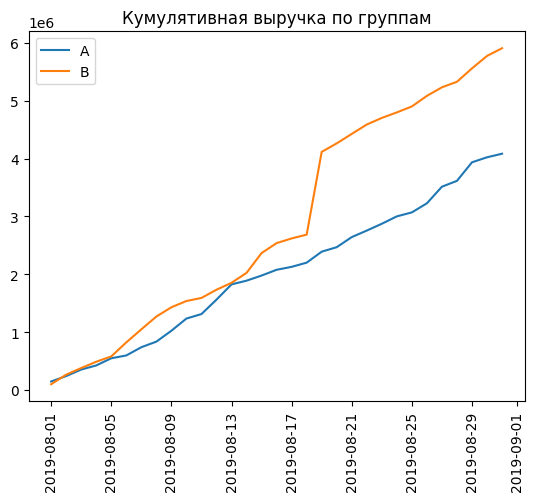

In [32]:
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xticks(rotation=90)
plt.legend() 
plt.show()

#### Вывод:

До 13 августа включительно кумулятивная выручка от пользователей обеих групп была примерно на одном уровне. В период с 13 по 18 августа кумулятивная выручка от заказов пользователей в группе B постепенно растет и выходит на лидерские позиции. В районе 18 августа случается резкий скачок кумулятивной выручки от группы B. В то время как кумулятивная выручка от группы А продолжает расти медленными темпами. К концу исследуемого периода кумулятивная выручка от заказов пользователей из группы B в 1,5 раза больше кумулятивной выручки, принесенной пользователями группы А.

### 3.2. График кумулятивного среднего чека

Для дальнейшего анализа построик график кумулятивного среднего чека по группам.

#### 3.2.1 Построение графика кумулятивного среднего чека по группам

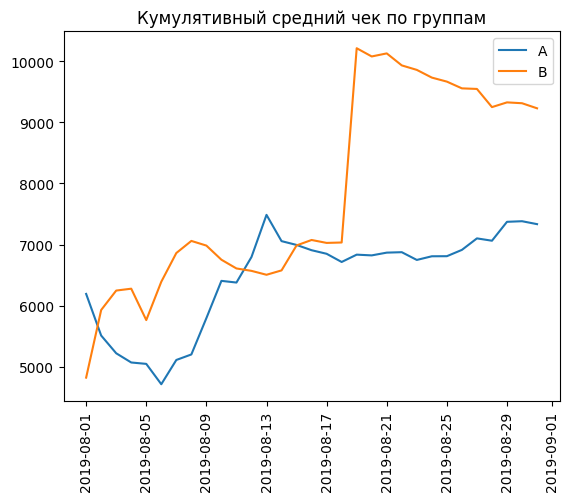

In [33]:
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Вывод

Графики кумулятивного среднего чека сильно колеблятся. В период до 17 августа большую часть времени кумулятивный средний чек заказов пользователей из группы В был больше кумулятивных средних чеков группы А. Лишь 13 августа группе А удается ненадолго вырваться в лидеры. Однако, уже с 17 августа динамика изменения среднего чека становится аналогичной графикам кумулятивной выручки, и где-то в районе 18 августа наблюдается очень резкий скачок кумулятивного среднего чека пользователей из группы B. Вероятно, в это время пользователи из этой группы совершили наиболее дорогостоящие покупки. Весь оставшийся период кумулятивный средний чек группы В оставался на высоком уровне, не опускаясь ниже 9000. Тогда как средний кумулятивный чек группы А едва ли достиг отметки 7000 к концу периода.

### 3.3 График относительного изменения кумулятивного среднего чека группы B к группе A

Для построения графика относительного изменения кумулятивного среднего чека группы В к группе А сначала объединим данные таблиц с кумулятивной выручкой по каждой группе.

In [34]:
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', \
right_on='date', how='left', suffixes=['A', 'B'])
merged_cumulative_revenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


#### 3.3.1 Построение графика относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного изменения кумулятивного среднего чека группы В к группе А, используя объединенную таблицу кумулятивной выручки по обеим группам:

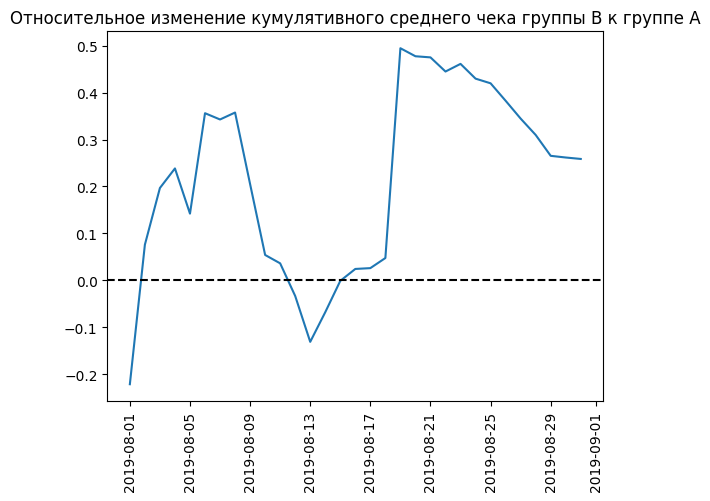

In [35]:
plt.plot(merged_cumulative_revenue['date'], (
    merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/
         (merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А')
plt.xticks(rotation=90)
plt.show()

#### Вывод

Большую часть времени кумулятивный средний чек пользователей из группы В был больше кумулятивного среднего чека пользователей из группы А. За исключением двух периодов падения: в начале теста и ближе к его середине. В целом, исследуемое отношение резко менялось на протяжении всего периода, от даты к дате, что говорит о большом влиянии 
дорогостоящих заказов, совершаемых пользователями.

### 3.4 График кумулятивного среднего количества заказов на посетителя по группам

Для начала посчитаем среднее количество заказов на одного пользователя. 

In [36]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

Выделим отдельно средние по группам:

In [37]:
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

#### 3.4.1 Построение графика кумулятивного среднего количества заказов на посетителя по группам

Теперь у нас есть все данные для построения графика:

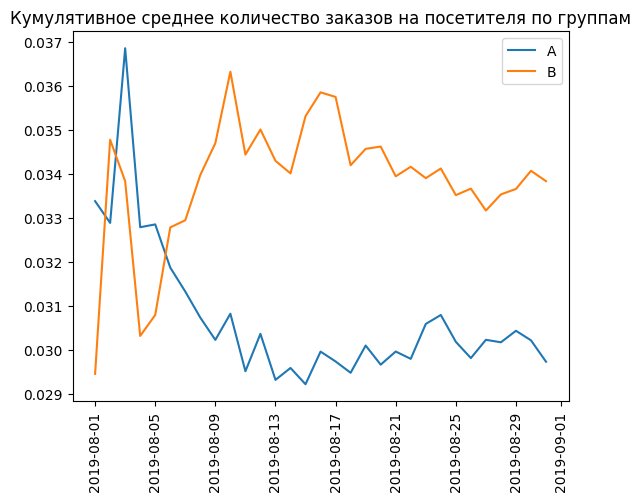

In [38]:
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.xticks(rotation=90)
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.legend()
plt.show()

#### Вывод

В начале периода кумулятивное среднее количество заказов на одного пользователя было примерно одинаковым в обеих группах. Начиная приблизительно с 6 августа, в количество заказов на одного посетителя стало быстро расти в группе В и также быстро падать в группе А. Графики на этом участке становятся практически симметричными. Начиная с отметки 6 августа среднее количество заказов на одного посетителя в группе А стабильно меньше, чем в группе В, несмотря на постоянные колебания в обеих когортах.

### 3.5 График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Перед построением графика объединим данные по среднему количеству заказов на одного пользователя в каждой группе:

In [39]:
merged_cumulative_conversions = cumulative_data_A[['date','conversion']].\
merge(cumulative_data_B[['date','conversion']],left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
merged_cumulative_conversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


#### 3.5.1 Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Переходим к построению графика:

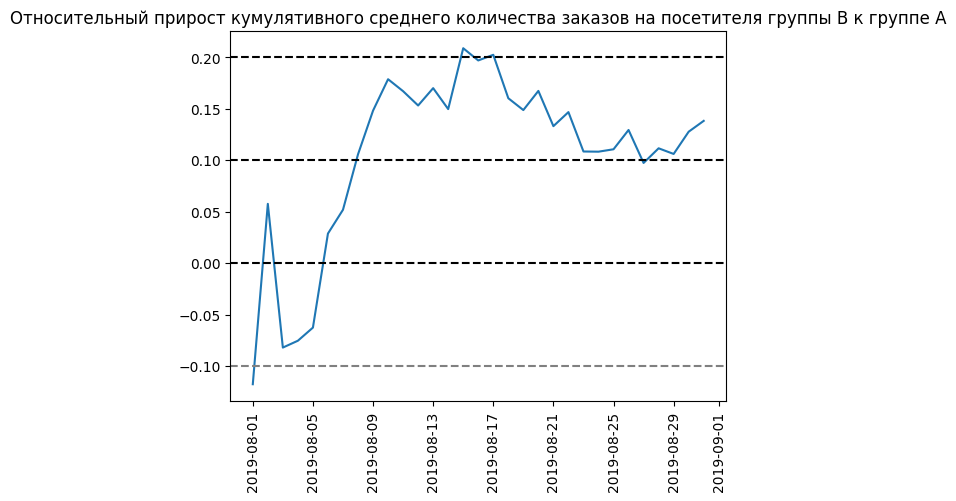

In [40]:
plt.plot(
    merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/
    merged_cumulative_conversions['conversionA']-1)
plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xticks(rotation=90)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axhline(y=0.1, color='black', linestyle='--')
plt.axhline(y=0.2, color='black', linestyle='--')
plt.show()

#### Вывод

В начале теста группа B проигрывала группе A по кумулятивному количеству заказов на одного посетителя. Однако затем группа В стремительно вырвалась вперёд. Среднее кумулятивное количество заказов на одного посетителя в этой группе было значительно более высоким, чем у посетителей из группы А, начиная с 6 августа и до конца исследуемого периода.

### 3.6 Точечный график количества заказов по пользователям

Для оценки выбросов по количеству заказов по пользователям в обеих группах, построим точечный график количества заказов по пользователям. Но для начала расчитаем количество заказов на одного пользователя.

In [41]:
# cгруппируем данные по заказам по visitor_id и посчитаем количество уникальных transaction_id
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})

orders_by_users.columns = ['visitor_id', 'orders']

# отсортируем значения по количеству заказов и выведем на экран первые 10 строк
orders_by_users.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


#### 3.6.1 Построение точечного графика количества заказов по пользователям

Теперь можно переходить к построению графика.

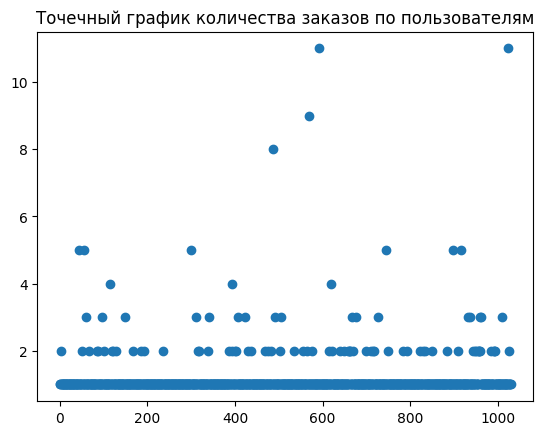

In [42]:
x_values = pd.Series(range(0,len(orders_by_users)))

plt.scatter(x_values, orders_by_users['orders']) 
plt.title('Точечный график количества заказов по пользователям')
plt.show()

#### Вывод

У большинства покупателей количество заказов не превышает 1. У достаточно большого количества посетителей количество покупок составляет 2-3. Однако есть несколько посетителей с количеством заказов более 8. Выбросы по количеству заказов на пользователя обнаружены. Пользователи, совершившие такое большое количество покупок, могут сильно повлиять на результаты теста для их групп.

### 3.7 Подсчет 95-й и 99-й перцентили количества заказов на пользователя

Посчитаем 95-й и 99-й перцентили количества заказов на одного пользователя:

In [43]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

#### Вывод

Не более 5% пользователей оформляли больше, чем 2 заказа. И 1% пользователей делали заказы более 4 раз. Таким образом, количество заказов больше 4 будем считать аномальным.

### 3.8 Точечный график стоимостей заказов

Теперь определим, есть ли выбросы по стоимости заказов. Для этого построим точечный график стоимостей.

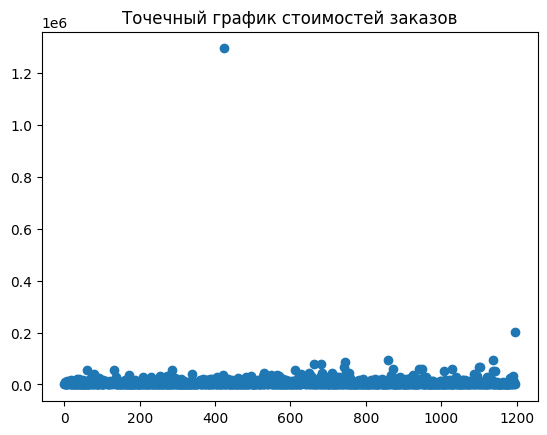

In [44]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('Точечный график стоимостей заказов')
plt.show()

#### Вывод

В глаза сразу бросается один очень крупный заказ на сумму 1,2 миллиона. Хотя даже заказ на сумму 0,2 миллиона, судя по графику, уже является аномально дорогостоящим для среднего посетителя. Для большинства покупателей сумма заказа не превышает 100 тысяч.

### 3.9 Подсчет 95-й и 99-й перцентили стоимости заказов

Посчитаем 95-й и 99-й перцентили стоимости заказов:

In [45]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

#### Вывод

5% заказов были оформлены на сумму свыше 28 тысяч. И 1% заказов были оформлены на сумму свыше 58,2 тысяч. Таким образом, сумма заказа свыше 58,2 тысяч является экстремально большой, то есть - аномальной.

### 3.10 Статистическая значимость различий в среднем количестве заказов на посетителя между группами

Посчитаем статистическую значимость различий в среднем количестве заказов на пользователя между группами. Расчеты будем производить по данным, включающим информацию об аномальных пользователях и заказах.

Сформулируем гипотезы. **Нулевая:** различий в среднем количестве заказов между группами нет. **Альтернативная:** различия в среднем между группами есть.

#### 3.10.1 Подготовка данных к анализу

Подготовим данные для анализа.

Рассчитаем количество посестителей в день в группе А:

In [46]:
visitors_A_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_date_A']
visitors_A_daily.head()

,date,visitors_per_date_A
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


Теперь рассчитаем кумулятивное количество пользователей в день в группе А:

In [47]:
visitors_A_сummulative = visitors_A_daily.apply(lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']]\
.agg({'date': 'max', 'visitors_per_date_A': 'sum'}), axis=1)

visitors_A_сummulative.columns = ['date', 'visitors_A_сummulative']
visitors_A_сummulative.head()

,date,visitors_A_сummulative
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


Аналогичные подсчеты сделаем для группы В.

In [48]:
# подсчитаем количество посетителей в группе В в день

visitors_B_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B']
visitors_B_daily.head()

,date,visitors_per_date_B
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


In [49]:
# подсчитаем кумулятивное количество посетителей в группе В в день

visitors_B_сummulative = visitors_B_daily.apply(lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']]\
.agg({'date': 'max', 'visitors_per_date_B': 'sum'}), axis=1)

visitors_B_сummulative.columns = ['date', 'visitors_cummulative_B']
visitors_B_сummulative.head()

,date,visitors_cummulative_B
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


Далее рассчитаем количество заказов в день в каждой группе.

In [50]:
# считаем количество заказов в день в группе А

orders_A_daily = orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']].\
groupby('date', as_index=False).agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']
orders_A_daily.head()

,date,orders_per_date_A,revenue_per_date_A
0,2019-08-01,24,148579
1,2019-08-02,20,93822
2,2019-08-03,24,112473
3,2019-08-04,16,70825
4,2019-08-05,25,124218


In [51]:
# считаем кумулятивное количество заказов в день в группе А

orders_A_сummulative = orders_A_daily.apply(lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']].\
agg({'date': 'max', 'orders_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}),axis=1).sort_values(by=['date'])

orders_A_сummulative.columns = ['date','orders_cummulative_A','revenue_cummulative_A']
orders_A_сummulative.head()

,date,orders_cummulative_A,revenue_cummulative_A
0,2019-08-01,24,148579
1,2019-08-02,44,242401
2,2019-08-03,68,354874
3,2019-08-04,84,425699
4,2019-08-05,109,549917


In [52]:
# считаем количество заказов в день в группе B
orders_B_daily = orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False).agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})

orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']
orders_B_daily.head()

,date,orders_per_date_B,revenue_per_date_B
0,2019-08-01,21,101217
1,2019-08-02,24,165531
2,2019-08-03,16,114248
3,2019-08-04,17,108571
4,2019-08-05,23,92428


In [53]:
# считаем кумулятивное количество заказов в день в группе B

orders_B_сummulative = orders_B_daily.apply(lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']].\
agg({'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}),axis=1).sort_values(by=['date'])

orders_B_сummulative.columns = ['date','orders_cummulative_B','revenue_cummulative_B']
orders_B_сummulative.head()

,date,orders_cummulative_B,revenue_cummulative_B
0,2019-08-01,21,101217
1,2019-08-02,45,266748
2,2019-08-03,61,380996
3,2019-08-04,78,489567
4,2019-08-05,101,581995


Объединим таблицы с данными о количестве пользователей и заказов в день в каждой группе с данными о кумулятивном количестве пользователей и заказов в день в каждой группе:

In [54]:
data = (
    orders_A_daily.merge(
        orders_B_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_A_сummulative, left_on='date', right_on='date', how='left')
    .merge(orders_B_сummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_A_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_B_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_A_сummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_B_сummulative, left_on='date', right_on='date', how='left')
)
data.head()

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cummulative_A,revenue_cummulative_A,orders_cummulative_B,revenue_cummulative_B,visitors_per_date_A,visitors_per_date_B,visitors_A_сummulative,visitors_cummulative_B
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Рассчитаем количество заказов на одного посетителя в группе А:

In [55]:
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

orders_by_users_A.columns = ['user_id', 'orders']
orders_by_users_A.head()

,user_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


Рассчитаем количество заказов на одного посетителя в группе B:

In [56]:
orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)

orders_by_users_B.columns = ['user_id', 'orders']
orders_by_users_B.head()

,user_id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


Составим таблицу с пользователям и с заказами, в которой пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули. 

In [57]:
# для группы А
sample_A = pd.concat([orders_by_users_A['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_A'].sum()\
- len(orders_by_users_A['orders'])), name='orders',),],axis=0,)
sample_A.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [58]:
# для группы В
sample_B = pd.concat([orders_by_users_B['orders'],pd.Series(0, index=np.arange(data['visitors_per_date_B'].sum()\
- len(orders_by_users_B['orders'])), name='orders',),],axis=0,)
sample_B.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

#### 3.10.2 Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами

Для проверки гипотезы о равенстве среднего количества заказов на посетителя в разных группах будем использовать тест Манна-Уитни. 

In [59]:
alpha = 0.05  # задаем критический уровень статистической значимости

results = st.mannwhitneyu(sample_A, sample_B)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-значение:  0.016792355056752604
Отвергаем нулевую гипотезу: разница статистически значима


Дополнительно рассчитаем относительное различие в среднем между группами:

In [60]:
(sample_B.mean() / sample_A.mean()-1).round(3)

0.138

Действительно, среднее количество заказов на одного пользователя в группе В выше среднего в группе А.

#### Вывод

P-value, полученный на основе результатов теста Манна-Уитни оказался ниже определенного уровня статистической значимости. Нулевую гипотезу отвергаем, разница между средним количеством заказов на одного посетителя в разных группах статистически значима.

То же показал расчет относительного различия между группами. Среднее количество заказов на одного пользователя в группе В больше в 1,14 раза среднего количества заказов на одного пользователя из группы А.

### 3.11 Cтатистическая значимость различий в среднем чеке заказа между группами 

Теперь посчитаем статистическую значимость различий среднего чека заказа между группами. Расчеты будем производить по данным, включающим информацию об аномальных пользователях и заказах.

Сформулируем гипотезы. **Нулевая**: различий в среднем чеке заказа между группами нет. **Альтернативная**: различия в среднем между группами есть.

#### 3.11.1 Расчет статистической значимости различий в среднем чеке заказа между группами

In [61]:
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-значение:  0.7292909855432458
Не получилось отвергнуть нулевую гипотезу


Дополнительно рассчитаем относительный прирост среднего чека группы B:

In [62]:
(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1).round(3)

0.259

Прирост среднего чека группы В составил 0.259. Это означает, что средний чек группы В выше среднего чека группы А в 1,259 раз.

#### Вывод

P-value, полученный на основе результатов теста Манна-Уитни оказался выше определенного уровня статистической значимости. Нулевую гипотезу отвергнуть не получилось. Разница между средним чеком в разных группах статистически не значима.

### 3.12 Статистическая значимость различий в среднем количестве заказов на посетителя между группами, рассчитанная по «очищенным» данным

Уберем из данных информацию об аномальных пользователях и заказах, то есть о пользователях, которые совершали экстремально большое количество покупок, и заказах, с нереалистично большой суммой, и посчитаем статистическую значимость различий в среднем количестве заказов на пользователя между группами еще раз. 

Сформулируем гипотезы. **Нулевая**: различий в среднем количестве заказов между группами нет. **Альтернативная**: различия в среднем между группами есть.

#### 3.12.1 Подготовка данных

Напомним, что за аномальные мы приняли:
- пользователей, совершивших 4 и более заказов; 
- заказы на сумму свыше 58,2 тысяч рублей.


Очищая данные, удалять будем именно пользователей, так как наша цель проанализировать поведение пользователей в разных группах. Для этого сначала найдем аномальные заказы, затем удалим пользователей, совершивших их.

Определим пользователей с числом заказов 4 и больше. Для этого объединим таблицы c данными о заказах пользователей из разных групп, отфильтровав их по количеству заказов пользователей.

In [63]:
users_with_many_orders = pd.concat(
    [orders_by_users_A[orders_by_users_A['orders'] >= 4]['user_id'],
     orders_by_users_B[orders_by_users_B['orders'] >= 4]['user_id']], axis=0)
users_with_many_orders

18     199603092 
23     237748145 
227    2038680547
269    2378935119
278    2458001652
499    4256040402
326    2378935119
340    2458001652
424    3062433592
501    3717692402
514    3803269165
580    4256040402
Name: user_id, dtype: int64

Определим пользователей с суммой заказа свыше 58,2 тысяч:

In [64]:
users_with_expensive_orders = orders[orders['revenue'] > 52800]['visitor_id']
users_with_expensive_orders.head()

60     4256040402
131    2254586615
287    2254456485
425    1920142716
613    3931967268
Name: visitor_id, dtype: int64

Объединим данные о тех и других пользователях в одной таблице:

In [65]:
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormal_users.head()

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
dtype: int64

Составим таблицы с пользователями и с заказами, в которой пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули. В этот раз будем использовать очищенные данные  — без
аномальных пользователей. 

In [66]:
sample_A_filtered = pd.concat(
    [orders_by_users_A[
            np.logical_not(orders_by_users_A['user_id'].isin(abnormal_users))]['orders'],\
     pd.Series(0,index=np.arange(data['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])),name='orders')],\
     axis=0)
sample_A_filtered.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

In [67]:
sample_B_filtered = pd.concat(
    [orders_by_users_B[np.logical_not(orders_by_users_B['user_id'].isin(abnormal_users))]['orders'],\
        pd.Series(0,index=np.arange(data['visitors_per_date_B'].sum()\
    - len(orders_by_users_B['orders'])),name='orders')], axis=0) 

sample_B_filtered.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

#### 3.12.2 Рассчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

In [68]:
results = st.mannwhitneyu(sample_A_filtered, sample_B_filtered)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-значение:  0.01254484555969441
Отвергаем нулевую гипотезу: разница статистически значима


Расчитаем также относительную разницу среднего количества по группам:

In [69]:
(sample_B_filtered.mean() / sample_A_filtered.mean()-1).round(3)

0.154

Расчеты показали, что разница между средним количеством заказов составляет менее 1,2 раз.

#### Вывод

P-value, полученный на основе результатов теста Манна-Уитни оказался ниже определенного уровня статистической значимости. Отвергаем нулевую гипотезу. Разница между средним количеством заказов на посетителя в разных группах осталась статистически незначимой даже после очистки данных от аномальных пользователей. Показатель p-value после удаления аномальных пользователей также слегка занизился. Тогла как относительная разница между группами слегка увеличилась.

### 3.13 Статистическая значимость различий в среднем чеке заказа между группами, рассчитаная по «очищенным» данным

Также на основе очищенных данных, посчитаем статистическую значимость различий среднего чека заказа между группами. 

Сформулируем гипотезы. **Нулевая**: различий в среднем чеке заказа между группами нет. **Альтернативная**: различия в среднем между группами есть.

#### 3.13.1 Расчет статистической значимости различий в среднем чеке заказа между группами на основе "очищенных" данных

In [70]:
results = st.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitor_id'].\
        isin(abnormal_users)))]['revenue'], orders[np.logical_and(orders['group'] == 'B',\
        np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'])

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу'
    ) 

p-значение:  0.9014216691855337
Не получилось отвергнуть нулевую гипотезу


Также посчитаем относительный прирост среднего чека в группе В для очищенных данных:

In [71]:
(orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitor_id'].\
        isin(abnormal_users)))]['revenue'].mean()/orders[np.logical_and(orders['group'] == 'A',\
          np.logical_not(orders['visitor_id'].isin(abnormal_users)))]['revenue'].mean()-1).round(3)

0.004

Прирост среднего чека в группе В значительно уменьшился, относительно рассчитанного по "сырым" данным.

#### Вывод

На результат теста Манна-Уитни, при расчете статистической значимости различий в среднем чеке заказа между группами, удаление аномальных пользователей также повлияло мало. Нулевую гипотезу вновь не удалось отвергнуть. Однако p-value значительно вырос. Разница между средним чеком в разных группах стала еще более статистически не значима. Об этом говорит и относительная разница средних чеков в разных группах. При расчете на очищенных данных она значительно уменьшилась и составила 1,004 раз. 

### 3.14 Итоги А/B теста

По результатам А/В теста можно сделать следующие выводы:

 - Есть статистически значимое различие по среднему количеству заказов между группами, как по «сырым», так и по данным после фильтрации аномалий;
 - Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
 - График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A.  Среднее кумулятивное количество заказов на одного посетителя в этой группе было значительно более высоким, чем у посетителей из группы А, начиная с 6 августа и до конца исследуемого периода;
- График различия среднего чека говорит о том, что хотя отношение среднего чека группы В к среднему чеку группы А и было подвержено резким скачкам, кумулятивный средний чек пользователей из группы В большую часть времени проведения теста был выше кумулятивного среднего чека пользователей из группы А.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Однако следует учитывать, что тест был проведен не совсем корректно: у 58 пользователей, участвующих в тесте, принадлежность к группе не была четко определена. Так как удалить эти данные из анализа не было возможности, при принятии окончательного решения необходимо иметь в виду этот нюанс.

## 4 Общие выводы

В качестве входных данных для исследования было получено 9 гипотез. А также результаты A/B-теста, разбитые на два файла: с заказами и с посещениями сайта интернет-магазина. Была поставлена задача приоритизировать гипотезы и проанализировать результаты A/B-теста.

Целью исследования было на основании результатов A/B-теста определить возможные пути увеличения выручки интернет-магазина.


Первым делом мы познакомились с данными и подготовили их к дальнейшему анализу. При знакомстве с данными было выявлено, что:
- оформление исходных таблиц не соответсвует правилам хорошего стиля;
- столбцы с информацией о времени содержат данные в неподходящем для дальнейшей работы формате object;
- 58 пользователей ошибочно определены одновременно в две группы. 

Так, наименования столбцов в исходных датафреймах были приведены к правилам хорошего стиля, столбцы с информацией о времени были приведены к формату datetime.

Что касается пользователей, которых определили сразу в две группы, так как количество строк с данными о заказах этих посетителей составляет 15% от общего количества строк в массиве orders, а так же в связи с тем, что в таблице visitors также есть данные об этих пользователях, и их нельзя оттуда выделить, было принято решение не удалять информацию о них и из orders.

Далее мы приоритизировали гипотезы. При приоритизации методом ICE наиболее приоритетными оказались гипотезы по номерами 8, 0 и 7. При использовании фреймворка RICE топ-3 приоритетными гипотезами стали гипотезы 7, 2 и 0. Гипотезы 7 и 0 также входили в топ-3 приоритетных гипотез во фреймфорке IСE, однако во фреймфорке RICE гипотеза под номером 7 оказалась приоритетной с огромным отрывом от всех остальных. 

Таким образом, предположим, что имеющиеся результаты А/В теста показывают итоги добавления для одной из групп пользователей формы подписки на все основные страницы интернет-магазина, с целью собрать базу клиентов для email-рассылок. 


Анализ этих результатов показал, что:

- среднее количество заказов на пользователя в группе В статистически значимо больше среднего количества заказов на пользователя в группе А;
- разница между средними чеками покупок в разных группах статистически не значима;
- среднее кумулятивное количество заказов на одного посетителя в группе В было значительно более высоким, чем у посетителей из группы А, начиная с 6 августа и до конца исследуемого периода;
- кумулятивный средний чек пользователей из группы В большую часть времени проведения теста был выше кумулятивного среднего чека пользователей из группы А.

Исходя из этого мы можем сделать вывод, что группа В лучше группы А. Тест следует остановить и признать его успешным. Добавление формы подписки на все основные страницы интернет-магазина приносит результат. Внедрение почтовых рассылок действительно может стать хорошим способом увеличения выручки интернет-магазина.

Однако следует учитывать, что тест был проведен не совсем корректно. Выше мы указали на то, что у 58 пользователей, участвующих в тесте, принадлежность к группе не была четко определена. Так как удалить эти данные из анализа не было возможности, при принятии окончательного решения необходимо иметь в виду этот нюанс. Возможно, также стоит провести дополнительное расследование на тему того, действительно ли эти посетители пользовались обеими версиями сайта или ошибка в самой выгрузке данных. 